# EDA and Visualizations

## Table of Contents
- [Data Prep](#Data-Prep)
- [Most Common Words Overall and by Subreddit](#Most-Common-Words-Overall-and-by-Subreddit)

After our three scripts for sourcing, cleaning, and preprocessing our data have run, we are ready to perform Exploratory Data Analysis and create visualizations of our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text 
import json

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Data Reading
df = pd.read_csv('../data/preprocessed_subreddit_data.csv')
df.dropna(inplace=True)

with open('../data/stop_words.json', 'r') as fp:
    stop_words = json.load(fp)

### Data Prep

In [4]:
df['fulltext'] = df['title'] + ' ' + df['selftext']

In [5]:
freefolk = df[df['subreddit']=='freefolk']
gameofthrones = df[df['subreddit']=='gameofthrones']
asoiaf = df[df['subreddit']=='asoiaf']

In [7]:
df_vec = CountVectorizer(stop_words=stop_words['words'],
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))

df_tab = df_vec.fit_transform(df['fulltext'])
df_pd = pd.DataFrame(df_tab.toarray(), columns=df_vec.get_feature_names())

In [8]:
ff_vec = CountVectorizer(stop_words=stop_words['words'],
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))
ff_tab = ff_vec.fit_transform(freefolk['fulltext'])
ff_pd = pd.DataFrame(ff_tab.toarray(), columns=ff_vec.get_feature_names())

In [9]:
got_vec = CountVectorizer(stop_words=stop_words['words'],
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))

got_tab = got_vec.fit_transform(gameofthrones['fulltext'])
got_pd = pd.DataFrame(got_tab.toarray(), columns=got_vec.get_feature_names())

In [10]:
asoiaf_vec = CountVectorizer(stop_words=stop_words['words'],
                        max_df=.325,
                        max_features = 6500,
                        min_df = 5,
                        ngram_range = (1,2))

asoiaf_tab = asoiaf_vec.fit_transform(asoiaf['fulltext'])
asoiaf_pd = pd.DataFrame(asoiaf_tab.toarray(), columns=asoiaf_vec.get_feature_names())

In [11]:
most_common_overall = df_pd.mean().sort_values(ascending=False)[0:100]

most_common_ff = ff_pd.mean().sort_values(ascending=False)[0:100]

most_common_got = got_pd.mean().sort_values(ascending=False)[0:100]

most_common_asoiaf = asoiaf_pd.mean().sort_values(ascending=False)[0:100]

### Most Common Words by Subreddit

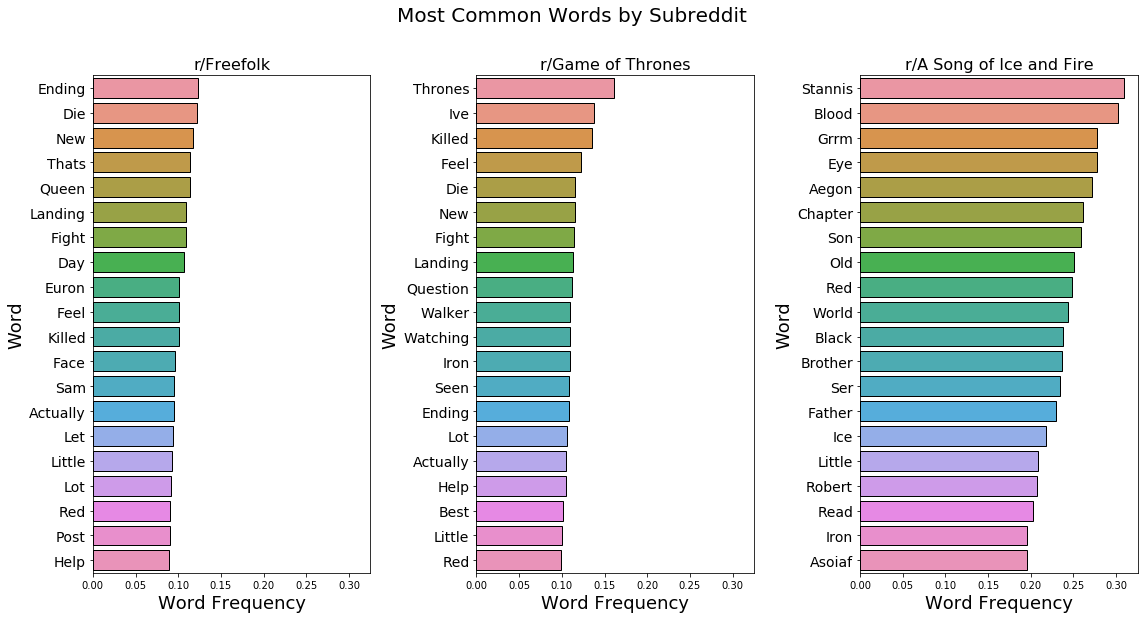

In [24]:
tables = [most_common_ff,most_common_got,most_common_asoiaf]
titles = ['r/Freefolk','r/Game of Thrones','r/A Song of Ice and Fire']

fig, ax = plt.subplots(1,3, sharex=True, figsize=(16,8))
axs = ax.ravel()
fig.suptitle('Most Common Words by Subreddit', fontsize=20, y=1.07)
for i, ax in enumerate(axs):
    plt.setp(ax.get_yticklabels(), fontsize=14)
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel('Word Frequency', fontsize=18)
    ax.set_ylabel('Word', fontsize=18)
    sns.barplot(tables[i][0:20],tables[i].index.str.title()[0:20], orient='h',ax=ax, ec='k', linewidth=1)
fig.tight_layout()

It is interesting that Stannis is such a comparatively hot topic in r/asoiaf. He is known to be a much more deep and fleshed-out character in the books than the television show, and there is a great degree of speculation about how certain cliffhangers around him will be resolved in the forthcoming next novel in the series.

Another character name which is high up for r/asoiaf but not the others is Aegon. This interpretation is a bit fuzzy, as there are two characters named Aegon in the series. While one is a main character in the TV show, there is a book-only character named Aegon who is theorized to be central to the denouement and resolution of the book series, and whose ancestry is somewhat called into question. Thus, many theories surrounding the novels still forthcoming and the resolution of the series include "Book Aegon's" true heritage and final fate, while show-only fans are unlikely to know or care about the character.

Perhaps the most standout 

Meanwhile, the most common word in r/Freefolk after our custom stopword removal is "Ending." This is unsurprising, as r/freefolk was generally much less satisfied with the ending of the television series. It's still a frequent topic in r/gameofthrones, but not to the same degree.

Some other words related to frequent complaints about the finale pop up in r/freefolk, such as "Landing" (aka "King's Landing," capital of the fictional continent of Westeros and setting of much of the last season). The character Euron also played a major role in the finale, which many on r/freefolk found to be unsatisfying, hence his strong presence in posts there.

It is also notable that about one year of this data comes from the time period between the release of Season 7 and Season 8, during which r/freefolk was the main forum for leaks, as they were banned on r/gameofthrones and confined to comments in megathreads in r/asoiaf. Thus we expect to see the difference in posts discussing the ending across all time periods.

By eliminating the most common words and character names among all three subreddits, we have quickly begun to tease out differences in the focus of discussion